In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [321]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample

from sklearn.metrics import precision_recall_fscore_support

In [3]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [4]:
data = pd.read_csv('learningSet.csv')

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_55710/3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


## Lesson 7.01 - Read Data

In [5]:
print(data.shape)
data.head(10)

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,...,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,...,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,...,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,...,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,...,X,X,X,41.0,C
4,8601,,0,FL,33176,...,X,X,X,26.0,A
5,9401,CWR,0,AL,35603,...,X,X,X,16.0,C
6,8701,DRK,0,IN,46755,...,X,X,X,53.0,D
7,9401,NWN,0,LA,70611,...,X,X,X,38.0,C
8,8801,LIS,1,IA,51033,...,X,X,X,57.0,D
9,9401,MSD,1,TN,37127-,...,X,X,X,34.0,B


In [6]:
data.dtypes

ODATEDW       int64
OSOURCE      object
TCODE         int64
STATE        object
ZIP          object
             ...   
MDMAUD_R     object
MDMAUD_F     object
MDMAUD_A     object
CLUSTER2    float64
GEOCODE2     object
Length: 481, dtype: object

In [7]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [8]:
data['TARGET_D'].value_counts()

0.00     90569
10.00      941
15.00      591
20.00      577
5.00       503
         ...  
18.25        1
10.70        1
2.50         1
16.87        1
44.21        1
Name: TARGET_D, Length: 71, dtype: int64

## Lesson 7.01 - Review Data

In [9]:
# CHECK FOR NULL VALUES

In [10]:
data.isna().sum()/len(data)

ODATEDW     0.000000
OSOURCE     0.000000
TCODE       0.000000
STATE       0.000000
ZIP         0.000000
              ...   
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
CLUSTER2    0.001383
GEOCODE2    0.001383
Length: 481, dtype: float64

In [11]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [12]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
...,...,...
455,RAMNT_24,0.814090
466,NEXTDATE,0.104526
467,TIMELAG,0.104526
479,CLUSTER2,0.001383


In [13]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(60)

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
...,...,...
423,RDATE_14,0.755618
424,RDATE_15,0.923888
425,RDATE_16,0.717080
426,RDATE_17,0.901469


In [14]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].tail(32)

,column_name,nulls_percentage
428,RDATE_19,0.833595
429,RDATE_20,0.917327
430,RDATE_21,0.900296
431,RDATE_22,0.781233
432,RDATE_23,0.917631
...,...,...
455,RAMNT_24,0.814090
466,NEXTDATE,0.104526
467,TIMELAG,0.104526
479,CLUSTER2,0.001383


In [15]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 72, dtype: object

In [16]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [17]:
# DROP COLUMNS OVER 25% THRESHOLD EXCEPT WEALTH1 WEALTH2

In [18]:
columns_to_omit = ['WEALTH1','WEALTH2']
drop_columns_list = [col for col in drop_columns_list if col not in columns_to_omit]
print(drop_columns_list)

['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [19]:
data = data.drop(columns=drop_columns_list)
data.shape

(95412, 411)

In [20]:
# FIX MAILCODES

In [21]:
data['MAILCODE'].value_counts()
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [22]:
# REPLACE BLANKS WITH NAN VALUES

In [23]:
data = data.apply(lambda x: x.replace(" ", np.NaN))
data.head(10)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,...,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,...,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,...,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,...,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,...,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,...,X,X,X,26.0,A
5,9401,CWR,0,AL,35603,...,X,X,X,16.0,C
6,8701,DRK,0,IN,46755,...,X,X,X,53.0,D
7,9401,NWN,0,LA,70611,...,X,X,X,38.0,C
8,8801,LIS,1,IA,51033,...,X,X,X,57.0,D
9,9401,MSD,1,TN,37127-,...,X,X,X,34.0,B


In [24]:
# REPEAT DROP COLUMNS ABOVE 25% THRESHOLD

In [25]:
nulls_percent_df2 = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df2
nulls_percent_df2.columns = ['column_name', 'nulls_percentage']
nulls_percent_df2

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.009726
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
406,MDMAUD_R,0.000000
407,MDMAUD_F,0.000000
408,MDMAUD_A,0.000000
409,CLUSTER2,0.001383


In [26]:
nulls_percent_df2[nulls_percent_df2['nulls_percentage']!=0]

,column_name,nulls_percentage
1,OSOURCE,0.009726
6,PVASTATE,0.984719
8,NOEXCH,0.000073
9,RECINHSE,0.929747
10,RECP3,0.978860
...,...,...
380,RFA_24,0.387509
396,NEXTDATE,0.104526
397,TIMELAG,0.104526
409,CLUSTER2,0.001383


In [27]:
nulls_percent_df2[nulls_percent_df2['nulls_percentage']!=0].head(60)

,column_name,nulls_percentage
1,OSOURCE,0.009726
6,PVASTATE,0.984719
8,NOEXCH,0.000073
9,RECINHSE,0.929747
10,RECP3,0.978860
...,...,...
354,ADATE_12,0.093521
355,ADATE_14,0.197742
356,ADATE_16,0.213432
357,ADATE_18,0.222855


In [28]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].tail(25)

,column_name,nulls_percentage
435,RAMNT_4,0.997055
436,RAMNT_5,0.999906
437,RAMNT_6,0.991867
438,RAMNT_7,0.906773
439,RAMNT_8,0.774955
...,...,...
455,RAMNT_24,0.814090
466,NEXTDATE,0.104526
467,TIMELAG,0.104526
479,CLUSTER2,0.001383


In [29]:
columns_above_threshold2 = nulls_percent_df2[nulls_percent_df2['nulls_percentage']>0.25]
columns_above_threshold2['column_name']

6      PVASTATE
9      RECINHSE
10        RECP3
11      RECPGVG
12     RECSWEEP
         ...   
376      RFA_20
377      RFA_21
378      RFA_22
379      RFA_23
380      RFA_24
Name: column_name, Length: 47, dtype: object

In [30]:
drop_columns_list2 = list(columns_above_threshold2['column_name'])
print(drop_columns_list2)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'WEALTH1', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


In [31]:
columns_to_omit2 = ['WEALTH1','WEALTH2', 'SOLIH','VETERANS']
drop_columns_list2 = [col for col in drop_columns_list2 if col not in columns_to_omit2]
print(drop_columns_list2)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'MAJOR', 'GEOCODE', 'COLLECT1', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


In [32]:
data = data.drop(columns=drop_columns_list2)
data.shape

(95412, 368)

## Lesson 7.01 - Separate Data Features

In [33]:
Y = data[['TARGET_B', 'TARGET_D']]
display(Y.head(30))
print(Y.isna().any().any())

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
25,0,0.0
26,0,0.0
27,0,0.0
28,0,0.0


False


In [34]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])

display(numerical.head())
display(numerical.shape)

,ODATEDW,TCODE,DOB,AGE,INCOME,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,...,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,...,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,...,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,...,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,...,6.864865,7112,1,2,26.0


(95412, 335)

In [35]:
categorical = data.select_dtypes(object)
display(categorical.head())
display(categorical.shape)

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,...,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,...,E,X,X,X,C
1,BOA,CA,91326,A,0,...,G,X,X,X,A
2,AMH,NC,27017,A,0,...,E,X,X,X,C
3,BRY,CA,95953,A,0,...,E,X,X,X,C
4,NaN,FL,33176,A,0,...,F,X,X,X,A


(95412, 31)

In [36]:
def find_outliers_iqr(data, factor=1.5):
    # Calculating the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    # Calculating the IQR (Interquartile Range) for each column
    IQR = Q3 - Q1
    # Defining the lower and upper bounds for identifying outliers
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    # Finding outliers by comparing values to the bounds
    outliers = ((data < lower_bound) | (data > upper_bound))
    # Count the number of outliers in each column
    outlier_count = outliers.sum()
    outlier_info = pd.DataFrame({'Columns': outlier_count.index, 'Outlier Count': outlier_count.values})
    return outliers, outlier_info
# Set the IQR factor for outlier detection (default is 1.5)
iqr_factor = 1.5
# Find outliers in the continuous_df DataFrame and get outlier counts
outliers, outlier_info = find_outliers_iqr(numerical, factor=iqr_factor)
# Display the DataFrame of outliers (True indicates an outlier)
print("Outliers:")
print(outliers)
# Display the DataFrame with outlier counts
print("Outlier Counts:")
outlier_info

Outliers:
       ODATEDW  TCODE    DOB    AGE  INCOME  ...  AVGGIFT  CONTROLN  HPHONE_D  \
0        False  False  False  False   False  ...    False     False     False   
1        False  False  False  False   False  ...    False     False     False   
2        False  False  False  False   False  ...    False     False     False   
3        False  False  False  False   False  ...    False     False     False   
4        False  False  False  False   False  ...    False     False     False   
...        ...    ...    ...    ...     ...  ...      ...       ...       ...   
95407    False  False  False  False   False  ...    False     False     False   
95408    False  False  False  False   False  ...    False     False     False   
95409    False  False  False  False   False  ...    False     False     False   
95410    False  False  False  False   False  ...    False     False     False   
95411    False  False  False  False   False  ...     True     False     False   

       RFA_2F  CL

,Columns,Outlier Count
0,ODATEDW,0
1,TCODE,10596
2,DOB,0
3,AGE,20
4,INCOME,0
...,...,...
330,AVGGIFT,3873
331,CONTROLN,0
332,HPHONE_D,0
333,RFA_2F,0


In [37]:
filtered_rows = outlier_info[outlier_info['Outlier Count'] > 0]
display(filtered_rows)

,Columns,Outlier Count
1,TCODE,10596
3,AGE,20
6,HIT,13637
7,MALEMILI,21414
8,MALEVET,5038
...,...,...
325,LASTGIFT,3497
327,FISTDATE,21
328,NEXTDATE,26
329,TIMELAG,3932


In [38]:
# WORKING WITH CATEGORICAL

In [39]:
categorical.isna().sum()/len(categorical)

OSOURCE     0.009726
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
NOEXCH      0.000073
              ...   
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.003343
Length: 31, dtype: float64

In [40]:
# CHECK FOR UNIQUE VALUES WITHIN CATEGORICAL DF

for column_name in categorical.columns:
    column_unique_counts = categorical[column_name].value_counts()
    print(f"Unique counts for column '{column_name}':{column_unique_counts}")

Unique counts for column 'OSOURCE':
MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
MDD       1
NRM       1
HDP       1
CRP       1
VIC       1
Name: OSOURCE, Length: 895, dtype: int64

Unique counts for column 'STATE':
CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
      ...  
WV        4
GU        4
DE        3
DC        1
AS        1
Name: STATE, Length: 57, dtype: int64

Unique counts for column 'ZIP':
85351     61
92653     59
85710     54
95608     50
60619     45
          ..
70058-     1
93024      1
96306      1
30060-     1
32776-     1
Name: ZIP, Length: 19938, dtype: int64

Unique counts for column 'MAILCODE':
A    94013
B     1399
Name: MAILCODE, dtype: int64

Unique counts for column 'NOEXCH':
0    61203
0    33882
1      195
1       90
X       35
Name: NOEXCH, dtype: int64

Unique counts for column 'MDMAUD':
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
        ...  
I2MM        1
L1MM        1
L2LM        1
C5

In [41]:
pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

,index,STATE
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654
...,...,...
52,WV,4
53,GU,4
54,DE,3
55,DC,1


In [42]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [43]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
         ...  
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, Length: 12, dtype: int64

In [44]:
categorical

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,...,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,...,E,X,X,X,C
1,BOA,CA,91326,A,0,...,G,X,X,X,A
2,AMH,NC,27017,A,0,...,E,X,X,X,C
3,BRY,CA,95953,A,0,...,E,X,X,X,C
4,NaN,FL,33176,A,0,...,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,other,99504,A,0,...,G,X,X,X,C
95408,DCD,TX,77379,A,0,...,F,X,X,X,A
95409,MBC,MI,48910,A,0,...,E,X,X,X,B
95410,PRV,CA,91320,A,0,...,F,X,X,X,A


# W7 Lab 1 - Revisiting Machine Learning

In [45]:
# DROP CATEGORICAL VALUES > 50% THRESHOLD

In [46]:
categorical.isna().sum()/len(data)

OSOURCE     0.009726
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
NOEXCH      0.000073
              ...   
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.003343
Length: 31, dtype: float64

In [47]:
nulls_percent_df3 = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_df3
nulls_percent_df3.columns = ['column_name', 'nulls_percentage']
nulls_percent_df3

,column_name,nulls_percentage
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,NOEXCH,0.000073
...,...,...
26,RFA_2A,0.000000
27,MDMAUD_R,0.000000
28,MDMAUD_F,0.000000
29,MDMAUD_A,0.000000


In [48]:
nulls_percent_df3[nulls_percent_df3['nulls_percentage']!=0]

,column_name,nulls_percentage
0,OSOURCE,0.009726
4,NOEXCH,0.000073
6,DOMAIN,0.024274
7,CLUSTER,0.024274
8,HOMEOWNR,0.232969
...,...,...
21,RFA_12,0.093521
22,RFA_14,0.197742
23,RFA_16,0.213988
24,RFA_18,0.222855


In [49]:
columns_above_threshold3 = nulls_percent_df3[nulls_percent_df3['nulls_percentage']>0.50]
columns_above_threshold3['column_name']

11       SOLIH
12    VETERANS
Name: column_name, dtype: object

In [50]:
# CLEAN GENDER VALUES

In [51]:
categorical['GENDER'].unique()
categorical['GENDER'].value_counts(dropna=False)

F      51277
M      39094
NaN     2957
U       1715
J        365
C          2
A          2
Name: GENDER, dtype: int64

In [52]:
categorical['GENDER'].fillna('F', inplace=True)

In [53]:
values_to_replace = ['J','C','U','A',]
replacement_value = 'Oth'
categorical['GENDER'].replace(values_to_replace, replacement_value, inplace=True)

## Lesson 7.02 - Data Cleaning Part 2

In [54]:
# CLEAN DOMAIN VALUES

In [55]:
categorical['DOMAIN'].value_counts(dropna=False)

R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
       ...  
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: DOMAIN, Length: 17, dtype: int64

In [56]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [57]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

In [58]:
categorical.DOMAIN_A.value_counts()

R    22106
S    21924
C    19689
T    19527
U    12166
Name: DOMAIN_A, dtype: int64

In [59]:
categorical = categorical.drop(columns=['DOMAIN'])

In [60]:
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,...,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,A,0,...,X,X,C,T,2
1,BOA,CA,91326,A,0,...,X,X,A,S,1
2,AMH,NC,27017,A,0,...,X,X,C,R,2
3,BRY,CA,95953,A,0,...,X,X,C,R,2
4,NaN,FL,33176,A,0,...,X,X,A,S,2


In [61]:
print(categorical.MAILCODE.value_counts())
print(categorical.NOEXCH.value_counts())
print(categorical.MDMAUD.value_counts())

A    94013
B     1399
Name: MAILCODE, dtype: int64
0    61203
0    33882
1      195
1       90
X       35
Name: NOEXCH, dtype: int64
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
        ...  
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, Length: 28, dtype: int64


In [62]:
# CREATE DROP LIST

In [63]:
drop_list = categorical[['SOLIH','VETERANS','OSOURCE','ZIP','MAILCODE','MDMAUD','NOEXCH']].columns.tolist()

In [64]:
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

In [65]:
drop_list

['SOLIH',
 'VETERANS',
 'OSOURCE',
 'ZIP',
 'MAILCODE',
 'MDMAUD',
 'NOEXCH',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A']

In [66]:
# DROP OTHER NAN VALUES

In [67]:
categorical['CLUSTER'].value_counts(dropna=False)

40    3979
35    3624
36    3617
27    3553
24    3539
      ... 
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, Length: 54, dtype: int64

In [68]:
categorical['CLUSTER'].sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '6', '7', '8', '9', nan], dtype=object)

In [69]:
# sorted(categorical['CLUSTER'].unique())

In [70]:
categorical['CLUSTER'].value_counts()

40    3979
35    3624
36    3617
27    3553
24    3539
      ... 
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, Length: 53, dtype: int64

In [71]:
sorted(categorical['CLUSTER'].value_counts().index)

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '6',
 '7',
 '8',
 '9']

In [72]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40') # 'other' would also be a valid choice

In [73]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H      52354
NaN    22228
U      20830
Name: HOMEOWNR, dtype: int64

In [74]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U') # assumption: NAN also means 'we don't know'

In [75]:
# REPLACING NAN VALUES IN DATASRCE AND GEOCODE2 

In [76]:
categorical['DATASRCE'].value_counts(dropna=False)

3      43549
2      23455
NaN    21280
1       7128
Name: DATASRCE, dtype: int64

In [77]:
categorical['DATASRCE'].fillna('1', inplace=True)

In [78]:
# REPLACING GEOCODE2 with Mode Values

mode_geocode2 = categorical['GEOCODE2'].mode().iloc[0]
categorical['GEOCODE2'].fillna(mode_geocode2, inplace=True)

In [79]:
categorical['GEOCODE2'].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [80]:
# REMOVE COLUMNS WITH 'ADATE_'

In [81]:
data = data.drop(df.filter(like='ADATE_').columns, axis=1)
display(data)
print(data.shape)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,...,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,...,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,...,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,...,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,...,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,...,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,...,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,...,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,...,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,...,X,X,X,11.0,A


(95412, 368)


In [82]:
# CONTINUING CLEANING CATEGORICAL DATA

In [83]:
categorical['RFA_6'].value_counts()

A1F    15696
F1F     6704
A1G     6634
A1E     5429
A2F     5353
       ...  
A3B        1
U1C        1
P1A        1
A2B        1
I1D        1
Name: RFA_6, Length: 108, dtype: int64

In [84]:
for col_name in categorical.columns:
    if 'RFA' in col_name:
        drop_list.append(col_name)

In [85]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['SOLIH',
 'VETERANS',
 'OSOURCE',
 'ZIP',
 'MAILCODE',
 'MDMAUD',
 'NOEXCH',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [86]:
categorical = categorical.drop(columns=drop_list)
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,U,F,1,L,E,C,T,2
1,CA,14,H,M,3,L,G,A,S,1
2,NC,43,U,M,3,L,E,C,R,2
3,CA,44,U,F,3,L,E,C,R,2
4,FL,16,H,F,3,L,F,A,S,2


In [87]:
categorical.isna().sum()

STATE       0
CLUSTER     0
HOMEOWNR    0
GENDER      0
DATASRCE    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

In [88]:
data['OSOURCE'].value_counts(dropna=False).head(60)

MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
ALZ     364
GUR     352
L15     347
PCL     341
FOR     340
Name: OSOURCE, Length: 60, dtype: int64

In [89]:
data['OSOURCE'] = data['OSOURCE'].fillna('MBC')

In [90]:
# categorical = categorical.drop(columns=['OSOURCE', 'ZIP'])
# categorical.head()

## Lesson 7.02 - Numerical Columns

In [91]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,...,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,...,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,...,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,...,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,...,6.864865,7112,1,2,26.0


In [92]:
numerical.shape

(95412, 335)

In [93]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
...,...,...
311,ADATE_16,20364
312,ADATE_18,21263
328,NEXTDATE,9973
329,TIMELAG,9973


In [94]:
# CHECK FOR NAN VALUES

In [95]:
mode_wealth1 = numerical['WEALTH1'].mode().iloc[0]
numerical['WEALTH1'].fillna(mode_wealth1, inplace=True)

# numerical['WEALTH1'] = numerical.WEALTH1.interpolate(method='nearest', axis=0)
# numerical = numerical.dropna(subset=['WEALTH1'])

print(numerical['WEALTH1'].value_counts(dropna=False))
numerical['WEALTH1'].shape

9.0    52317
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64


(95412,)

In [96]:
mode_wealth2 = numerical['WEALTH2'].mode().iloc[0]
numerical['WEALTH2'].fillna(mode_wealth2, inplace=True)

# numerical['WEALTH1'] = numerical.WEALTH1.interpolate(method='nearest', axis=0)
# numerical = numerical.dropna(subset=['WEALTH1'])

print(numerical['WEALTH2'].value_counts(dropna=False))
numerical['WEALTH2'].shape

9.0    50346
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64


(95412,)

In [97]:
numerical['WEALTH2'].shape

(95412,)

In [98]:
numerical['TIMELAG'].value_counts(dropna=False)

mode_timelag = numerical['TIMELAG'].mode().iloc[0]
numerical['TIMELAG'].fillna(mode_timelag, inplace=True)

print(numerical['TIMELAG'].value_counts(dropna=False))


# numerical['TIMELAG'].unique().tolist()
# numerical['TIMELAG'] = numerical.TIMELAG.interpolate(method='nearest', axis=0)



5.0       18557
4.0        8490
3.0        8485
6.0        6648
2.0        6275
          ...  
89.0          1
77.0          1
61.0          1
58.0          1
1088.0        1
Name: TIMELAG, Length: 68, dtype: int64


In [99]:
# DROP ROWS > 30 (5 YEARS) AS CONSIDERD DORMANT

# numerical = numerical[numerical['TIMELAG'] <= 30]
# numerical['TIMELAG'].value_counts(dropna=False)

In [100]:
# FILLING NAN VALUES WITH PLOTS

In [101]:
numerical['AGE'].value_counts(dropna=False)

NaN     23665
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: AGE, Length: 97, dtype: int64

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_55710/3426581607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['AGE'])


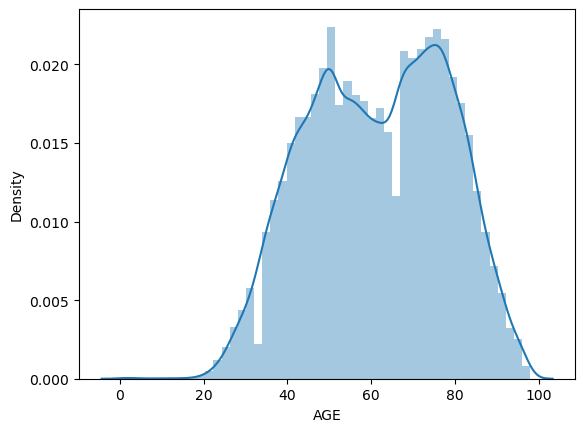

In [102]:
sns.distplot(numerical['AGE'])
plt.show()

In [103]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_55710/3426581607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['AGE'])


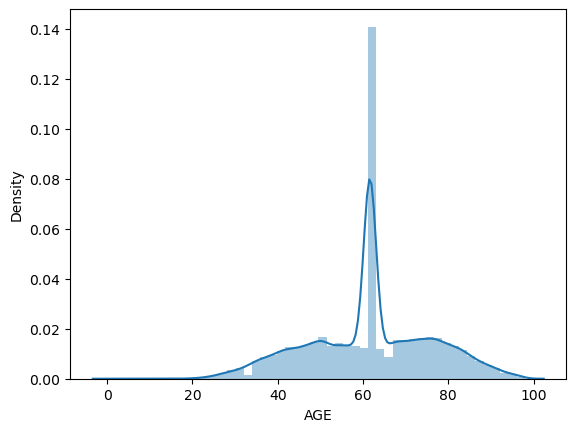

In [104]:
sns.distplot(numerical['AGE'])
plt.show()

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_55710/458945194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['INCOME'])


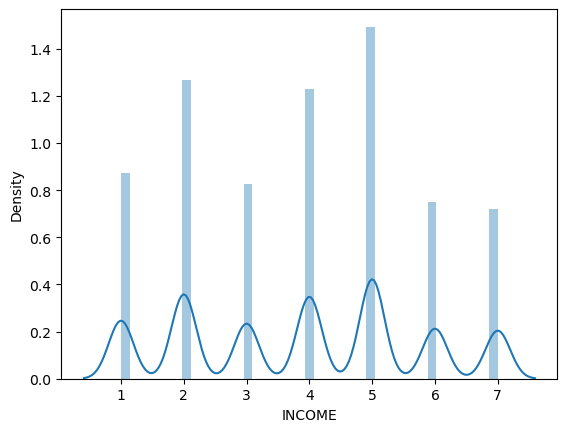

In [105]:
sns.distplot(numerical['INCOME']) 
plt.show()

In [106]:
print(numerical['INCOME'].value_counts(dropna=False))

NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64


In [107]:
numerical['INCOME'] = numerical['INCOME'].fillna(5.0)

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_55710/2601548513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2'])


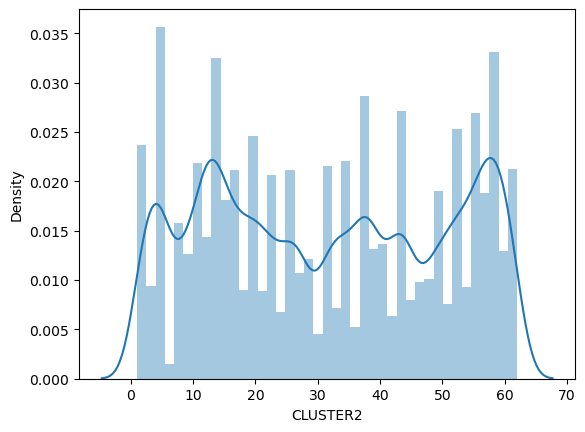

In [108]:
sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [109]:
numerical['CLUSTER2'].value_counts(dropna=False)

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
46.0     644
29.0     569
40.0     369
6.0      211
NaN      132
Name: CLUSTER2, Length: 63, dtype: int64

In [110]:
np.mean(numerical['CLUSTER2'])

31.533711167086484

In [111]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

In [112]:
np.ceil(np.mean(numerical['CLUSTER2']))

32.0

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_55710/1459726427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['CLUSTER2'])


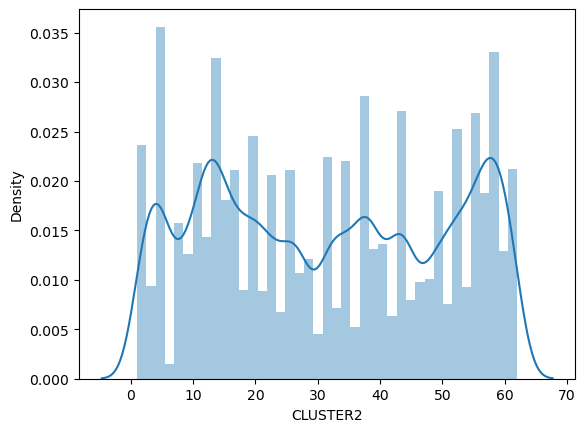

In [113]:
sns.distplot(numerical['CLUSTER2']) 
plt.show()

# W7 Lab 2 - Feature Engineering

In [114]:
# CLEAN NUMERICAL DATA

In [115]:
numerical.isna().sum()/len(data)

ODATEDW     0.0
TCODE       0.0
DOB         0.0
AGE         0.0
INCOME      0.0
           ... 
AVGGIFT     0.0
CONTROLN    0.0
HPHONE_D    0.0
RFA_2F      0.0
CLUSTER2    0.0
Length: 335, dtype: float64

In [116]:
# APPLY THE SAME NAN PERCENTAGE CHECK

nulls_percent_df4 = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_df4
nulls_percent_df4.columns = ['column_name', 'nulls_percentage']
nulls_percent_df4

,column_name,nulls_percentage
0,ODATEDW,0.0
1,TCODE,0.0
2,DOB,0.0
3,AGE,0.0
4,INCOME,0.0
...,...,...
330,AVGGIFT,0.0
331,CONTROLN,0.0
332,HPHONE_D,0.0
333,RFA_2F,0.0


In [117]:
nulls_percent_df4[nulls_percent_df4['nulls_percentage']!=0].head(60)

,column_name,nulls_percentage
135,MSA,0.001383
136,ADI,0.001383
137,DMA,0.001383
302,ADATE_3,0.020438
303,ADATE_4,0.022964
...,...,...
309,ADATE_12,0.093521
310,ADATE_14,0.197742
311,ADATE_16,0.213432
312,ADATE_18,0.222855


In [118]:
print(numerical['MSA'].value_counts(dropna=False))
numerical['MSA'] = numerical["MSA"].fillna(np.mean(numerical['MSA']))

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64


In [119]:
print(numerical['MSA'].value_counts(dropna=False))

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64


In [120]:
print(numerical['ADI'].value_counts(dropna=False))
numerical['ADI'] = numerical["ADI"].fillna(np.mean(numerical['ADI']))

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64


In [121]:
print(numerical['ADI'].value_counts(dropna=False))

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64


In [122]:
# REPLACE NAN WITH MODE

print(numerical['DMA'].value_counts(dropna=False))

mode_dma = numerical['DMA'].mode()[0]
numerical['DMA'] = numerical['DMA'].fillna(mode_dma)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64


In [123]:
# INTERPOLATE ADATE COLUMNS AND DISTRIBUTE WITH NEAREST VALUE

adate_columns = [col for col in numerical.columns if col.startswith("ADATE_")]
numerical[adate_columns] = numerical[adate_columns].interpolate()

In [124]:
print(numerical['NEXTDATE'].value_counts(dropna=False))
numerical['NEXTDATE'] = numerical.NEXTDATE.interpolate(method='nearest', axis=0)

NaN       9973
9504.0    2253
9412.0    1970
8703.0    1959
9512.0    1870
          ... 
8107.0       1
7408.0       1
8207.0       1
8104.0       1
8412.0       1
Name: NEXTDATE, Length: 189, dtype: int64


In [125]:
print(numerical.isna().any())

ODATEDW     False
TCODE       False
DOB         False
AGE         False
INCOME      False
            ...  
AVGGIFT     False
CONTROLN    False
HPHONE_D    False
RFA_2F      False
CLUSTER2    False
Length: 335, dtype: bool


In [126]:
# CHECK ADATE_14 AND ADATE_18 COLUMNS

print(numerical['ADATE_14'].value_counts(dropna=False))
print(numerical['ADATE_18'].value_counts(dropna=False))

numerical = numerical.dropna(subset=['ADATE_14'])
numerical = numerical.dropna(subset=['ADATE_18'])

9506.000000    95168
9504.000000      164
9505.000000       60
9505.333333        7
9504.666667        7
9505.500000        3
9504.500000        3
Name: ADATE_14, dtype: int64
9501.000000    50682
9412.000000    34133
9456.500000     6473
9441.666667     1469
9471.333333     1469
               ...  
9457.000000        1
9443.000000        1
9474.000000        1
9473.333333        1
9442.666667        1
Name: ADATE_18, Length: 54, dtype: int64


In [127]:
print(numerical.shape)
print(categorical.shape)

(95412, 335)
(95412, 10)


In [128]:
# CHECK TO SEE IF ANY NAN VALUES

print(numerical.isna().any().any())
print(categorical.isna().any().any())

False
False


In [129]:
# SAVE TO CSV

numerical.to_csv('numerical.csv', index=False)
categorical.to_csv('categorical.csv', index=False)

# W7 Lab 4 - Handling Data Imbalance

In [130]:
clean_df = pd.concat([numerical, categorical], axis=1)
clean_df.head(60)
numerical.isna().any().any()

False

In [131]:
clean_df.columns.tolist()

['ODATEDW',
 'TCODE',
 'DOB',
 'AGE',
 'INCOME',
 'WEALTH1',
 'HIT',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'WEALTH2',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN3',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW1',
 'DW2',
 'DW3',
 'DW4',
 'DW5',
 'DW6',
 'DW7',
 'DW8',
 'DW9',
 'HV1',
 'HV2',
 'HV3',
 'HV4',
 'HU1',
 'HU2',
 'HU3',
 'HU4',
 'HU5',
 'HHD1',
 'HHD2',
 'HHD3',
 'HHD4',
 'HHD5',
 'HHD6',
 'HHD7',
 'H

In [132]:
target_b = data['TARGET_B']
target_d = data['TARGET_D']
donor_df = pd.concat([target_b, target_d, clean_df], axis=1)

## Split, Scale & Encode (V1)

In [133]:
# SPLIT DATAFRAME X-y

In [134]:
# Use the new DF as the X axis with the 'Target-B' column from the original dataframe.                                                                                    

X = donor_df
y = donor_df['TARGET_B']


print(data['TARGET_B'].shape)
print(clean_df.shape)
print(clean_df.dtypes)

(95412,)
(95412, 345)
ODATEDW       int64
TCODE         int64
DOB           int64
AGE         float64
INCOME      float64
             ...   
RFA_2R       object
RFA_2A       object
GEOCODE2     object
DOMAIN_A     object
DOMAIN_B     object
Length: 345, dtype: object


In [135]:
X.isna().any().any()

False

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Seprate the training and testing data between numerical and categorical columns

X_train_cat = X_train.select_dtypes(object)
X_train_num = X_train.select_dtypes(np.number)

X_test_cat = X_test.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)

In [138]:
# Scale the data using Standard Scaler

transformer = StandardScaler().fit(X_train_num)

X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_test_num.columns)

display(X_train_scaled.head())
display(X_test_scaled.head())

display(X_train.shape)
display(X_test.shape)

,TARGET_B,TARGET_D,ODATEDW,TCODE,DOB,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,-0.230948,-0.179248,1.337488,-0.027017,-1.276055,...,0.154316,-0.096287,0.998678,-0.849602,-0.243007
1,-0.230948,-0.179248,-0.408079,-0.056202,0.318579,...,0.112266,-1.393723,-1.001324,0.082301,1.464782
2,-0.230948,-0.179248,-0.989934,-0.055160,0.365466,...,-0.707178,-0.667969,0.998678,0.082301,1.144571
3,-0.230948,-0.179248,-0.989934,-0.054118,-0.056519,...,-0.596038,-0.247390,0.998678,-0.849602,-0.509848
4,-0.230948,-0.179248,-0.699007,-0.056202,-1.276055,...,-0.136428,0.811036,0.998678,-0.849602,0.610888


,TARGET_B,TARGET_D,ODATEDW,TCODE,DOB,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,-0.230948,-0.179248,1.337488,-0.055160,1.443872,...,1.079409,0.681494,0.998678,0.082301,-1.043532
1,-0.230948,-0.179248,-0.117151,-0.056202,-0.196243,...,-0.628456,0.982613,-1.001324,1.014205,-0.563217
2,-0.230948,-0.179248,0.755632,-0.056202,0.881226,...,-0.798531,-0.513409,-1.001324,1.946108,-1.310374
3,-0.230948,-0.179248,0.464704,-0.056202,0.787451,...,0.154316,0.930803,-1.001324,-0.849602,-1.577216
4,-0.230948,-0.179248,-0.117151,-0.055160,0.693677,...,0.223698,0.720342,0.998678,1.014205,-1.523848


(76329, 347)

(19083, 347)

In [139]:
# Separate Categorical and drop 'CLUSTER' from OneHot Encoding due to length of unique values

X_train_cat_onehot = X_train_cat.drop(columns=['CLUSTER']) 
display(X_train_cat_onehot.head())
display(X_train_cat_onehot.shape)

X_test_cat_onehot = X_test_cat.drop(columns=['CLUSTER']) 
display(X_test_cat_onehot.head())
display(X_test_cat_onehot.shape)

,STATE,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
85225,IL,U,F,1,L,F,A,U,1
70004,TX,H,F,2,L,F,D,S,1
88133,other,H,M,3,L,E,D,T,2
79106,other,H,M,2,L,E,A,S,3
35476,other,U,F,2,L,F,B,R,2


(76329, 9)

,STATE,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
84155,other,U,M,1,L,G,C,S,1
75272,CA,U,F,1,L,E,A,S,2
39719,MI,H,F,3,L,D,A,U,1
44288,CA,H,F,2,L,F,A,S,1
35420,other,H,M,3,L,G,A,C,2


(19083, 9)

In [140]:
# OneHot encode the training categorical values

# Fit on the training data
encoder = OneHotEncoder(drop="first", sparse=False)
encoded_train = encoder.fit_transform(X_train_cat_onehot)
X_train_cat_onehot_encoded = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out())

# Transform the testing data using the same encoder and feature names
encoded_test = encoder.transform(X_test_cat_onehot)
X_test_cat_onehot_encoded = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out())

# Reset index
X_train_cat_onehot_encoded.reset_index(drop=True, inplace=True)
X_test_cat_onehot_encoded.reset_index(drop=True, inplace=True)

# Display the head of the encoded DataFrames
display(X_train_cat_onehot_encoded.head())
display(X_test_cat_onehot_encoded.head())


# encoder = OneHotEncoder(drop="first").fit(X_train_cat_onehot)

# encoded_train = encoder.transform(X_train_cat_onehot).toarray()
# X_train_cat_onehot = pd.DataFrame(encoded_train, columns = encoder.get_feature_names_out())


# encoded_test = encoder.transform(X_test_cat_onehot).toarray()
# X_test_cat_onehot = pd.DataFrame(encoded_test, columns = encoder.get_feature_names_out())

# X_train_cat_onehot.head()
# X_test_cat_onehot.head()






# encoder = OneHotEncoder(drop="first", sparse=False)
# encoded_train = encoder.fit_transform(X_train_cat_onehot)

# # Get the feature names for the encoded columns
# feature_names = encoder.get_feature_names_out()

# # Display the feature names
# print(feature_names)



/Users/hysteria/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,...,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,...,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0


In [141]:
# Ordinal encode the CLUSTER column due to unique value lengths

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train_cat[['CLUSTER']])

X_train_cat['CLUSTER'] = ordinal_encoder.transform(X_train_cat[['CLUSTER']])
X_test_cat['CLUSTER'] = ordinal_encoder.transform(X_test_cat[['CLUSTER']])

X_train_cat_ord = X_train_cat[['CLUSTER']]
X_test_cat_ord = X_test_cat[['CLUSTER']]

display(X_train_cat_ord)

,CLUSTER
85225,11.0
70004,2.0
88133,29.0
79106,13.0
35476,37.0
...,...
6265,15.0
54886,13.0
76820,3.0
860,39.0


In [142]:
# Check X dimensions and shape to ensure no data anamolies

# Training Data
display(X_train_cat_onehot_encoded.shape)
display(X_train_cat_ord.shape)
display(X_train_num.shape)


# Testing Data
display(X_train_cat_onehot_encoded.shape)
display(X_test_cat_ord.shape)
display(X_test_num.shape)

(76329, 29)

(76329, 1)

(76329, 337)

(76329, 29)

(19083, 1)

(19083, 337)

In [143]:
# Reset the index for training and testing data

X_train_cat_onehot_encoded.reset_index(drop=True, inplace=True)
X_train_cat_ord.reset_index(drop=True, inplace=True)
X_train_num.reset_index(drop=True, inplace=True)

X_test_cat_onehot_encoded.reset_index(drop=True, inplace=True)
X_test_cat_ord.reset_index(drop=True, inplace=True)
X_test_num.reset_index(drop=True, inplace=True)

# Concact the training and testing dataframes

X_train_processed = pd.concat([X_train_cat_onehot_encoded, X_train_cat_ord, X_train_num], axis=1)
X_test_processed = pd.concat([X_test_cat_onehot_encoded, X_test_cat_ord, X_test_num], axis=1)

display(X_train_processed.dtypes)
display(X_test_processed.dtypes)

STATE_FL    float64
STATE_GA    float64
STATE_IL    float64
STATE_IN    float64
STATE_MI    float64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2    float64
Length: 367, dtype: object

STATE_FL    float64
STATE_GA    float64
STATE_IL    float64
STATE_IN    float64
STATE_MI    float64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2    float64
Length: 367, dtype: object

In [144]:
# CLASSIFICATION MODELS

In [145]:
y_train.shape

(76329,)

In [146]:
# Model training and evaluation (Random Forest Classifier)

rf_classifier1 = RandomForestClassifier(random_state=42)
rf_classifier1.fit(X_train_processed, y_train)

y_pred_rf_train1 = rf_classifier1.predict(X_train_processed)
accuracy_rf_train1 = accuracy_score(y_train, y_pred_rf_train1)

y_pred_rf_test1 = rf_classifier1.predict(X_test_processed)
accuracy_rf_test1 = accuracy_score(y_test, y_pred_rf_test1)

print(f"RandomForestClassifier with SMOTE:")
print(f"Training Accuracy -> {accuracy_rf_train1:.4f}")
print(f"Test Accuracy -> {accuracy_rf_test1:.4f}")



# Model training and evaluation (Logistic Regression)

logistic_regression1 = LogisticRegression(random_state=42)
logistic_regression1.fit(X_train_processed, y_train)

y_pred_lr_train1 = logistic_regression1.predict(X_train_processed)
accuracy_lr_train1 = accuracy_score(y_train, y_pred_lr_train1)

y_pred_lr_test1 = logistic_regression1.predict(X_test_processed)
accuracy_lr_test1 = accuracy_score(y_test, y_pred_lr_test1)
                                  
print(f"LogisticRegression with SMOTE:")
print(f"Training Accuracy -> {accuracy_lr_train1:.4f}")
print(f"Test Accuracy -> {accuracy_lr_test1:.4f}")

RandomForestClassifier with SMOTE:
Training Accuracy -> 1.0000
Test Accuracy -> 1.0000
LogisticRegression with SMOTE:
Training Accuracy -> 0.9494
Test Accuracy -> 0.9488


/Users/hysteria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
y_pred_test1 = rf_classifier1.predict(X_test_processed)

In [148]:
# CLASSIFICATION REPORT 1

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test1))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test1))

# Display some of the predicted and actual values
results_df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test1})
print("Actual vs Predicted:")
print(results_df1.head(10))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18105
           1       1.00      1.00      1.00       978

    accuracy                           1.00     19083
   macro avg       1.00      1.00      1.00     19083
weighted avg       1.00      1.00      1.00     19083


Confusion Matrix:
[[18105     0]
 [    0   978]]

Actual vs Predicted:
       Actual  Predicted
84155       0          0
75272       0          0
39719       0          0
44288       0          0
35420       0          0
73646       0          0
50953       1          1
77609       0          0
22492       0          0
83128       1          1


### First Conclusion 

Despite the data set being quite unbalanced, I seem to have a high RFC and LR score. This is without dropping any feature columns, but rather just encoding/scaling. However on the Classification Report, I can see that there is an overbalance when predicting the 0 class with high accuracy but low accuracy when predicting the 1 class for TARGET_B.  So let's resample the data for imbalance.

# Restart Data PreProcessing (V2)

Based on the existing DF without upsampling, we can see that the model isn't optimal. With this information I want to re-process the data, re-encode and upsample before splitting for train/testing.

In [183]:
X = donor_df.drop(['TARGET_B'], axis=1)
y = donor_df['TARGET_B']

In [184]:
display(X.shape)
display(y.shape)

(95412, 346)

(95412,)

## Scale & Encode Data

In [185]:
# SEPARATE NUM & CAT FOR SCALE & ENCODING

X_cat = X.select_dtypes(object)
X_num = X.select_dtypes(np.number)

In [186]:
# SCALE NUMERICAL

transformer = StandardScaler().fit(X_num)
X_num_scaled = pd.DataFrame(transformer.transform(X_num), columns=X_num.columns)

display(X_num_scaled)

,TARGET_D,ODATEDW,TCODE,DOB,AGE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,-0.179035,-0.699843,-0.056847,0.463551,-1.115292e-01,...,-0.520509,-0.004760,-1.001238,1.948226,0.398135
1,-0.179035,0.755960,-0.055799,1.162350,-1.080356e+00,...,0.215310,0.954282,-1.001238,0.083847,-1.628365
2,-0.179035,-0.408683,-0.055799,-1.277349,-4.917093e-16,...,-0.544692,-1.459730,0.998764,1.948226,1.518043
3,-0.179035,-1.282165,-0.056847,0.036299,5.804901e-01,...,-0.606808,1.388782,0.998764,1.948226,0.504793
4,-0.179035,-1.573325,-0.056847,-0.338895,1.134106e+00,...,-0.601946,-1.603822,0.998764,0.083847,-0.295141
...,...,...,...,...,...,...,...,...,...,...,...
95407,-0.179035,1.338282,-0.055799,-1.277349,-4.917093e-16,...,1.081920,1.606058,-1.001238,-0.848342,-1.041747
95408,-0.179035,1.338282,-0.055799,1.068082,-9.419524e-01,...,0.617665,0.487079,0.998764,-0.848342,-1.575036
95409,-0.179035,1.047121,-0.055799,0.505291,-1.115292e-01,...,-0.470019,1.697820,0.998764,1.016037,0.131490
95410,3.884444,-1.573325,-0.056847,0.600966,-2.499331e-01,...,-0.111555,-1.647577,0.998764,1.948226,-1.095076


In [187]:
# Separate Categorical and drop 'CLUSTER' from OneHot Encoding due to length of unique values

X_cat_onehot = X_cat.drop(columns=['CLUSTER']) 
display(X_cat_onehot.head())
display(X_cat_onehot.shape)

,STATE,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,U,F,1,L,E,C,T,2
1,CA,H,M,3,L,G,A,S,1
2,NC,U,M,3,L,E,C,R,2
3,CA,U,F,3,L,E,C,R,2
4,FL,H,F,3,L,F,A,S,2


(95412, 9)

In [188]:
print(X_cat_onehot.isnull().sum())
print(X_cat_onehot.dtypes)
print(encoder.get_feature_names_out())

STATE       0
HOMEOWNR    0
GENDER      0
DATASRCE    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64
STATE       object
HOMEOWNR    object
GENDER      object
DATASRCE    object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B    object
dtype: object
['STATE_FL' 'STATE_GA' 'STATE_IL' 'STATE_IN' 'STATE_MI' 'STATE_MO'
 'STATE_NC' 'STATE_TX' 'STATE_WA' 'STATE_WI' 'STATE_other' 'HOMEOWNR_U'
 'GENDER_M' 'GENDER_Oth' 'DATASRCE_2' 'DATASRCE_3' 'RFA_2A_E' 'RFA_2A_F'
 'RFA_2A_G' 'GEOCODE2_B' 'GEOCODE2_C' 'GEOCODE2_D' 'DOMAIN_A_R'
 'DOMAIN_A_S' 'DOMAIN_A_T' 'DOMAIN_A_U' 'DOMAIN_B_2' 'DOMAIN_B_3'
 'DOMAIN_B_4']


In [189]:
# ONEHOT ENCODE CATEGORICAL DATA

encoder = OneHotEncoder(drop="first", sparse=False)
encoded = encoder.fit_transform(X_cat_onehot)
X_cat_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

display(X_cat_encoded)

/Users/hysteria/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,...,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95407,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
95408,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
95409,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0
95410,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [190]:
# ORDINAL ENCODE THE CLUSTER COLUMN

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_cat[['CLUSTER']])

X_cat['CLUSTER'] = ordinal_encoder.transform(X_cat[['CLUSTER']])

X_cat_ord = X_cat[['CLUSTER']]

display(X_cat_ord)

,CLUSTER
0,29.0
1,5.0
2,37.0
3,38.0
4,7.0
...,...
95407,19.0
95408,16.0
95409,23.0
95410,16.0


In [191]:
# Reset the index for training and testing data

X_num_scaled.reset_index(drop=True, inplace=True)
X_cat_ord.reset_index(drop=True, inplace=True)
X_cat_encoded.reset_index(drop=True, inplace=True)

# Concact the training and testing dataframes

X_processed = pd.concat([X_num_scaled, X_cat_ord, X_cat_encoded], axis=1)

display(X_processed.dtypes)

TARGET_D      float64
ODATEDW       float64
TCODE         float64
DOB           float64
AGE           float64
               ...   
DOMAIN_A_T    float64
DOMAIN_A_U    float64
DOMAIN_B_2    float64
DOMAIN_B_3    float64
DOMAIN_B_4    float64
Length: 366, dtype: object

## Upsampling Data (V2)

In [192]:
# SPLIT DATA BEFORE UPSAMPLING

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [193]:
# CONCAT PROCESSED DATA FOR UPSAMPLING

processed_df = pd.concat([X_train_2, y_train_2], axis=1)

df_majority = processed_df[processed_df['TARGET_B'] == 0]
df_minority = processed_df[processed_df['TARGET_B'] == 1]

# Upsample the training data
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X_train_upsampled = df_upsampled.drop('TARGET_B', axis=1)
y_train_upsampled = df_upsampled['TARGET_B']

In [194]:
display(X_train_upsampled)
display(y_train_upsampled)

,TARGET_D,ODATEDW,TCODE,DOB,AGE,...,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
85225,-0.179035,1.338282,-0.027492,-1.277349,-4.917093e-16,...,0.0,1.0,0.0,0.0,0.0
70004,-0.179035,-0.408683,-0.056847,0.317694,1.652785e-01,...,0.0,0.0,0.0,0.0,0.0
88133,-0.179035,-0.991004,-0.055799,0.364593,9.607655e-02,...,1.0,0.0,1.0,0.0,0.0
79106,-0.179035,-0.991004,-0.054750,-0.057500,7.188939e-01,...,0.0,0.0,0.0,1.0,0.0
35476,-0.179035,-0.699843,-0.056847,-1.277349,-4.917093e-16,...,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
60674,3.207197,-1.573325,-0.055799,0.318163,1.652785e-01,...,0.0,0.0,1.0,0.0,0.0
31094,4.335941,-1.573325,-0.055799,-1.277349,-4.917093e-16,...,0.0,0.0,1.0,0.0,0.0
25312,2.529951,1.338282,-0.056847,1.302578,-1.287962e+00,...,0.0,0.0,0.0,0.0,0.0
23409,2.642825,-0.699843,-0.055799,-0.009663,6.496920e-01,...,1.0,0.0,1.0,0.0,0.0


85225    0
70004    0
88133    0
79106    0
35476    0
        ..
60674    1
31094    1
25312    1
23409    1
31423    1
Name: TARGET_B, Length: 144928, dtype: int64

## Re-test Classifcation Model

In [195]:
# Model training and evaluation (Random Forest Classifier)

rf_classifier2 = RandomForestClassifier(random_state=42)
rf_classifier2.fit(X_train_upsampled, y_train_upsampled)

y_pred_rf_train2 = rf_classifier2.predict(X_train_upsampled)
accuracy_rf_train2 = accuracy_score(y_train_upsampled, y_pred_rf_train2)

y_pred_rf_test2 = rf_classifier2.predict(X_test_2)
accuracy_rf_test2 = accuracy_score(y_test_2, y_pred_rf_test2)

print(f"RandomForestClassifier with Resample:")
print(f"Training Accuracy -> {accuracy_rf_train2:.4f}")
print(f"Test Accuracy -> {accuracy_rf_test2:.4f}")



# Model training and evaluation (Logistic Regression)

logistic_regression2 = LogisticRegression(random_state=42)
logistic_regression2.fit(X_train_upsampled, y_train_upsampled)

y_pred_lr_train2 = logistic_regression2.predict(X_train_upsampled)
accuracy_lr_train2 = accuracy_score(y_train_upsampled, y_pred_lr_train2)

y_pred_lr_test2 = logistic_regression2.predict(X_test_2)
accuracy_lr_test2 = accuracy_score(y_test_2, y_pred_lr_test2)
                                  
print(f"LogisticRegression with Resample:")
print(f"Training Accuracy -> {accuracy_lr_train2:.4f}")
print(f"Test Accuracy -> {accuracy_lr_test2:.4f}")

RandomForestClassifier with Resample:
Training Accuracy -> 1.0000
Test Accuracy -> 0.9925
LogisticRegression with Resample:
Training Accuracy -> 1.0000
Test Accuracy -> 0.9998


/Users/hysteria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [196]:
y_pred_test2 = rf_classifier2.predict(X_test_2)

In [197]:
# CLASSIFICATION REPORT 2

# Print classification report
print("Classification Report:")
print(classification_report(y_test_2, y_pred_test2))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_2, y_pred_test2))

# Display some of the predicted and actual values
results_df2 = pd.DataFrame({'Actual': y_test_2, 'Predicted': y_pred_test2})
print("Actual vs Predicted:")
print(results_df2.head(10))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18105
           1       1.00      0.85      0.92       978

    accuracy                           0.99     19083
   macro avg       1.00      0.93      0.96     19083
weighted avg       0.99      0.99      0.99     19083


Confusion Matrix:
[[18105     0]
 [  143   835]]

Actual vs Predicted:
       Actual  Predicted
84155       0          0
75272       0          0
39719       0          0
44288       0          0
35420       0          0
73646       0          0
50953       1          1
77609       0          0
22492       0          0
83128       1          1


In [198]:
# PRECISION RECALL F1 COMPARISON

precision, recall, f1, _ = precision_recall_fscore_support(y_test_2, y_pred_test2, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 1.0000
Recall: 0.8538
F1 Score: 0.9211


### Second Concluson

The first obversation is that the RFC scores have improved to almost perfect on both training and testing data. This implies that the upsampled data has improved performance on both counts. For the LR, it has decreased dramatically which could suggest that it's struggling to fit with the upsampled data.

The next step i'd like to try is to upsample the data using another method, in this case SMOTE.

## Resample using SMOTE

In [199]:
# Use the processed data prior to the upsample

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [200]:
# Apply SMOTE only to the training data

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_3, y_train_3)


# Model training and evaluation (Random Forest Classifier)

rf_classifier3 = RandomForestClassifier(random_state=42)
rf_classifier3.fit(X_train_smote, y_train_smote)

y_pred_rf_train3 = rf_classifier3.predict(X_train_smote)
accuracy_rf_train3 = accuracy_score(y_train_smote, y_pred_rf_train3)

y_pred_rf_test3 = rf_classifier3.predict(X_test_3)
accuracy_rf_test3 = accuracy_score(y_test_3, y_pred_rf_test3)

print(f"RandomForestClassifier with SMOTE:")
print(f"Training Accuracy -> {accuracy_rf_train3:.4f}")
print(f"Test Accuracy -> {accuracy_rf_test3:.4f}")



# Model training and evaluation (Logistic Regression)

logistic_regression3 = LogisticRegression(random_state=42)
logistic_regression3.fit(X_train_smote, y_train_smote)

y_pred_lr_train3 = logistic_regression3.predict(X_train_smote)
accuracy_lr_train3 = accuracy_score(y_train_smote, y_pred_lr_train3)

y_pred_lr_test3 = logistic_regression3.predict(X_test_3)
accuracy_lr_test3 = accuracy_score(y_test_3, y_pred_lr_test3)
                                  
print(f"LogisticRegression with SMOTE:")
print(f"Training Accuracy -> {accuracy_lr_train3:.4f}")
print(f"Test Accuracy -> {accuracy_lr_test3:.4f}")

RandomForestClassifier with SMOTE:
Training Accuracy -> 1.0000
Test Accuracy -> 0.9991
LogisticRegression with SMOTE:
Training Accuracy -> 1.0000
Test Accuracy -> 0.9997


/Users/hysteria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
y_pred_test3 = rf_classifier3.predict(X_test_3)

In [202]:
# CLASSFICATION REPORT 3

# Print classification report
print("Classification Report:")
print(classification_report(y_test_3, y_pred_test3))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_3, y_pred_test3))

# Display some of the predicted values and actual values
results_df3 = pd.DataFrame({'Actual': y_test_3, 'Predicted': y_pred_test3})
print("Actual vs Predicted:")
print(results_df3.head(10))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18105
           1       1.00      0.98      0.99       978

    accuracy                           1.00     19083
   macro avg       1.00      0.99      1.00     19083
weighted avg       1.00      1.00      1.00     19083


Confusion Matrix:
[[18105     0]
 [   18   960]]

Actual vs Predicted:
       Actual  Predicted
84155       0          0
75272       0          0
39719       0          0
44288       0          0
35420       0          0
73646       0          0
50953       1          1
77609       0          0
22492       0          0
83128       1          1


In [203]:
# PRECISION RECALL F1 COMPARISON

precision3, recall3, f13, _ = precision_recall_fscore_support(y_test_3, y_pred_test3, average='binary')

print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(f"F1 Score: {f13:.4f}")

Precision: 1.0000
Recall: 0.9816
F1 Score: 0.9907


# W7 - Lab 5 Random Forest (V4)

Performance a RandomForestClassifation and Feature Selection to create a model.

In [334]:
# USE PROCESSED DF

X4 = pd.concat([X_train_processed, X_test_processed], axis=0)
y4 = data['TARGET_B']

In [335]:
display(X4)
display(y4)

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.0,0.0,1.0,0.0,0.0,...,15.000000,90621,1,1,27.0
1,0.0,0.0,0.0,0.0,0.0,...,14.545455,18950,0,2,59.0
2,0.0,0.0,0.0,0.0,0.0,...,5.687500,59041,1,2,53.0
3,0.0,0.0,0.0,0.0,0.0,...,6.888889,82274,1,1,22.0
4,0.0,0.0,0.0,0.0,0.0,...,11.857143,140742,1,1,43.0
...,...,...,...,...,...,...,...,...,...,...,...
19078,0.0,0.0,0.0,0.0,0.0,...,8.500000,48008,0,3,60.0
19079,0.0,0.0,0.0,0.0,0.0,...,13.000000,121222,0,2,26.0
19080,0.0,0.0,0.0,0.0,0.0,...,10.666667,108280,1,1,4.0
19081,0.0,0.0,0.0,0.0,0.0,...,20.000000,175377,0,3,12.0


0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [338]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [ ]:
# FIT RFC CLASSIFICATION

rf_classifier4 = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier4.fit(X_train4, y_train4)

In [ ]:
# APPLY SFM FEATURE SELECTION

sfm = SelectFromModel(rf_classifier4, threshold='median')
sfm.fit(X_train4, y_train4)

In [ ]:
# TRANSFORM REDUCED FEATURES

X_train_selected4 = sfm.transform(X_train4)
X_test_selected4 = sfm.transform(X_test4)

In [ ]:
selected_feature_names = X4.columns[sfm.get_support()]
print("Selected Features:", selected_feature_names)

In [339]:
# TRAIN RFC ON REDUCED FEATURES

rf_classifier_selected = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier_selected.fit(X_train_selected4, y_train4)

Selected Features: Index(['CLUSTER', 'ODATEDW', 'TCODE', 'DOB', 'AGE', 'INCOME', 'WEALTH1', 'HIT',
       'MALEVET', 'VIETVETS',
       ...
       'MAXRDATE', 'LASTGIFT', 'LASTDATE', 'FISTDATE', 'NEXTDATE', 'TIMELAG',
       'AVGGIFT', 'CONTROLN', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=184)
Accuracy on Test Set: 0.9480165592412094


In [ ]:
# EVALUATE AND SCORE

accuracy = rf_classifier_selected.score(X_test_selected4, y_test4)
print("Accuracy on Test Set:", accuracy)

In [340]:
selected_features = sfm.get_support()
num_selected_features = sum(selected_features)
print("Number of Selected Features:", num_selected_features)

Number of Selected Features: 184


In [325]:
# # EVALUATE PERFORMANCE

# accuracy = rf_classifier_selected.score(X_test_selected, y_test)
# print("Accuracy on Test Set:", accuracy)


# print("Classification Report:")
# print(classification_report(y_test, y_pred))


# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

Accuracy on Test Set: 0.9480165592412094
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18105
           1       0.00      0.00      0.00       978

    accuracy                           0.95     19083
   macro avg       0.47      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083


Confusion Matrix:
[[18100     5]
 [  978     0]]


In [ ]:
selected_features_process1 = X4.columns[sfm.get_support()]

In [328]:
display(selected_features_process1.shape)

(184,)

In [366]:
# CREATE DF FROM REDUCED FEATURES

X_train_selected_df = pd.DataFrame(X_train_selected4, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected4, columns=selected_feature_names)

display("Selected Features:", selected_feature_names)

display("X_train_selected_df:")
display(X_train_selected_df.head())

display("X_test_selected_df:")
display(X_test_selected_df.head())

'Selected Features:'

Index(['CLUSTER', 'ODATEDW', 'TCODE', 'DOB', 'AGE', 'INCOME', 'WEALTH1', 'HIT',
       'MALEVET', 'VIETVETS',
       ...
       'MAXRDATE', 'LASTGIFT', 'LASTDATE', 'FISTDATE', 'NEXTDATE', 'TIMELAG',
       'AVGGIFT', 'CONTROLN', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=184)

'X_train_selected_df:'

,CLUSTER,ODATEDW,TCODE,DOB,AGE,...,TIMELAG,AVGGIFT,CONTROLN,RFA_2F,CLUSTER2
0,13.0,9501.0,0.0,4601.0,52.000000,...,9.0,12.500000,38036.0,1.0,25.0
1,14.0,9501.0,0.0,0.0,61.611649,...,10.0,21.666667,64409.0,2.0,33.0
2,2.0,9401.0,28.0,0.0,61.611649,...,10.0,12.500000,166870.0,2.0,11.0
3,20.0,8601.0,2.0,2001.0,78.000000,...,7.0,8.533333,20752.0,2.0,13.0
4,46.0,8601.0,2.0,1301.0,85.000000,...,12.0,18.571429,109414.0,1.0,60.0


'X_test_selected_df:'

,CLUSTER,ODATEDW,TCODE,DOB,AGE,...,TIMELAG,AVGGIFT,CONTROLN,RFA_2F,CLUSTER2
0,32.0,8601.0,0.0,0.0,61.611649,...,7.0,8.800000,51144.0,3.0,39.0
1,40.0,8701.0,0.0,3201.0,66.000000,...,8.0,7.300000,173242.0,1.0,56.0
2,28.0,8901.0,1.0,1304.0,85.000000,...,6.0,20.666667,83334.0,4.0,38.0
3,9.0,9401.0,1.0,3909.0,58.000000,...,3.0,16.600000,38289.0,1.0,21.0
4,2.0,9501.0,28.0,5001.0,48.000000,...,5.0,20.000000,175691.0,1.0,11.0


In [397]:
# CONCAT PROCESSED X-FRAME

X_all = pd.concat([X_train_selected_df, X_test_selected_df], axis=0)
X_all.reset_index(drop=True, inplace=True)
X_all

,CLUSTER,ODATEDW,TCODE,DOB,AGE,...,TIMELAG,AVGGIFT,CONTROLN,RFA_2F,CLUSTER2
0,13.0,9501.0,0.0,4601.0,52.000000,...,9.0,12.500000,38036.0,1.0,25.0
1,14.0,9501.0,0.0,0.0,61.611649,...,10.0,21.666667,64409.0,2.0,33.0
2,2.0,9401.0,28.0,0.0,61.611649,...,10.0,12.500000,166870.0,2.0,11.0
3,20.0,8601.0,2.0,2001.0,78.000000,...,7.0,8.533333,20752.0,2.0,13.0
4,46.0,8601.0,2.0,1301.0,85.000000,...,12.0,18.571429,109414.0,1.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
95407,14.0,9401.0,28.0,7401.0,24.000000,...,4.0,9.230769,4881.0,3.0,36.0
95408,32.0,8601.0,1.0,2510.0,72.000000,...,13.0,10.666667,106432.0,2.0,37.0
95409,13.0,9401.0,28.0,4601.0,52.000000,...,4.0,15.250000,135699.0,1.0,25.0
95410,32.0,9101.0,1.0,1208.0,85.000000,...,2.0,12.000000,73031.0,1.0,38.0


In [398]:
# USE MODEL TO PREDICT TARGET_B

predictions_all = rf_classifier_selected.predict(X_all)
X_all['PRED_B'] = predictions_all

/Users/hysteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [401]:
X_all['PRED_B'].value_counts()

0    91531
1     3881
Name: PRED_B, dtype: int64

In [394]:
donor_df = donor_df[['TARGET_B','TARGET_D']]

In [400]:
# CONCAT PROCESSED DF WITH DONOR TARGETS

pred_df = pd.concat([donor_df, X_all], axis=1)
display(pred_df)

,TARGET_B,TARGET_D,CLUSTER,ODATEDW,TCODE,...,AVGGIFT,CONTROLN,RFA_2F,CLUSTER2,PRED_B
0,0,0.0,13.0,9501.0,0.0,...,12.500000,38036.0,1.0,25.0,0
1,0,0.0,14.0,9501.0,0.0,...,21.666667,64409.0,2.0,33.0,0
2,0,0.0,2.0,9401.0,28.0,...,12.500000,166870.0,2.0,11.0,0
3,0,0.0,20.0,8601.0,2.0,...,8.533333,20752.0,2.0,13.0,0
4,0,0.0,46.0,8601.0,2.0,...,18.571429,109414.0,1.0,60.0,0
...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0.0,14.0,9401.0,28.0,...,9.230769,4881.0,3.0,36.0,0
95408,0,0.0,32.0,8601.0,1.0,...,10.666667,106432.0,2.0,37.0,0
95409,0,0.0,13.0,9401.0,28.0,...,15.250000,135699.0,1.0,25.0,0
95410,1,18.0,32.0,9101.0,1.0,...,12.000000,73031.0,1.0,38.0,0


In [404]:
# CHECK WHERE TARGET_B == PRED_B

mask = (pred_df['TARGET_B'] == 1) & (pred_df['PRED_B'] == 1)
filtered_rows = pred_df[mask]
display(filtered_rows)

,TARGET_B,TARGET_D,CLUSTER,ODATEDW,TCODE,...,AVGGIFT,CONTROLN,RFA_2F,CLUSTER2,PRED_B
30,1,7.0,42.0,9601.0,1.0,...,10.500000,95831.0,2.0,59.0,1
318,1,10.0,16.0,9601.0,1.0,...,20.000000,19997.0,1.0,12.0,1
457,1,26.0,51.0,9401.0,0.0,...,10.800000,190894.0,3.0,9.0,1
802,1,15.0,16.0,9401.0,0.0,...,17.500000,35300.0,2.0,7.0,1
1608,1,40.0,9.0,9201.0,1.0,...,24.000000,10202.0,1.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...
74858,1,18.0,35.0,9501.0,1.0,...,20.000000,26138.0,3.0,38.0,1
74990,1,25.0,38.0,9001.0,0.0,...,10.200000,136365.0,2.0,56.0,1
75370,1,7.0,11.0,8601.0,0.0,...,6.961538,168477.0,4.0,9.0,1
75832,1,16.0,28.0,9601.0,0.0,...,12.500000,130771.0,2.0,15.0,1


In [405]:
# SAVE TO CSV

pred_df.to_csv('pred_df.csv', index=False)

# Process 2

This part of the project we forcus on TARGET_D by importing the previous processed dataset

In [ ]:
# TRAIN REGRESSION MODEL ON TARGET_D

In [419]:
X_new = pred_df.drop(['TARGET_D','PRED_B'], axis=1)
y_new = pred_df['TARGET_D']

In [420]:
display(X_new.shape)
display(y_new.shape)

(95412, 185)

(95412,)

In [421]:
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [422]:
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42)
rf_regressor.fit(X_newtrain, y_newtrain)

y_newpred = rf_regressor.predict(X_newtest)

mse = mean_squared_error(y_newtest, y_newpred)
r2 = r2_score(y_newtest, y_newpred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 9.1554
R-squared Score: 0.5557


In [ ]:
# SUBSET THE DATA ON TARGET_B

In [423]:
subset_data = pred_df[pred_df['TARGET_B'] == 1]

In [424]:
X_sub = subset_data.drop(['TARGET_D','PRED_B'], axis=1)
y_sub = subset_data['TARGET_D']

In [425]:
X_subtrain, X_subtest, y_subtrain, y_subtest = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)

In [426]:
y_subpred = rf_regressor.predict(X_subtest)

mse = mean_squared_error(y_subtest, y_subpred)
r2 = r2_score(y_subtest, y_subpred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 54.0603
R-squared Score: 0.6365


In [ ]:
# DONATION PREDICTION FOR TARGET_D

In [430]:
X_subset = subset_data.drop(['TARGET_D', 'PRED_B'], axis=1)  # Assuming you drop the target variable

predictions_subset = rf_regressor.predict(X_subset)

predicted_subset_data = subset_data.copy()
predicted_subset_data['PRED_D'] = predictions_subset

display(predicted_subset_data[['TARGET_D', 'PRED_D']])

,TARGET_D,PRED_D
20,4.0,8.06000
30,7.0,10.54400
45,5.0,9.97050
78,13.0,13.90700
93,10.0,11.62142
...,...,...
95298,20.0,18.02800
95309,15.0,14.96200
95398,3.0,6.98900
95403,10.0,11.06600


In [433]:
# SAVE TO CSV

predicted_subset_data.to_csv('donor_amount.csv', index=False)

# Conclusion

There are some learnings I have found whilst working on this project:

1. Data imbalance really skews the prediction model to one side, and resampling without adjusting parameters doesn't affect the model as much as I expected.
2. The prediction model heavily leans towards the majority class which I found difficult to adjust.
3. When predicting the TARGET_B, this was difficult to get the classification model to get the '1' correct.
4. The Regression Model did a better job predicting TARGET_D.